In [54]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["font.family"] = ["Latin Modern Roman"]
plt.rcParams["mathtext.fontset"] = 'cm'

from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

In [16]:
water = ct.Water()
temp = Q_(250, 'degC')
pres = Q_(0.01, 'atm')

water.TP = temp.to('K').magnitude, pres.to('Pa').magnitude
water()


  water:

       temperature   523.15 K
          pressure   1013.3 Pa
           density   0.0041969 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   1
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.2993e+07       -2.3409e+08  J
   internal energy       -1.3235e+07       -2.3843e+08  J
           entropy             13677        2.4641e+05  J/K
    Gibbs function       -2.0148e+07       -3.6299e+08  J
 heat capacity c_p            1967.6             35449  J/K
 heat capacity c_v              1506             27132  J/K



In [35]:
volumes = np.logspace(-2, 3, 50)
int_energies = np.zeros_like(volumes)

for idx, vol in en umerate(volumes):
    water.TV = temp.to('K').magnitude, vol
    int_energies[idx] = water.u


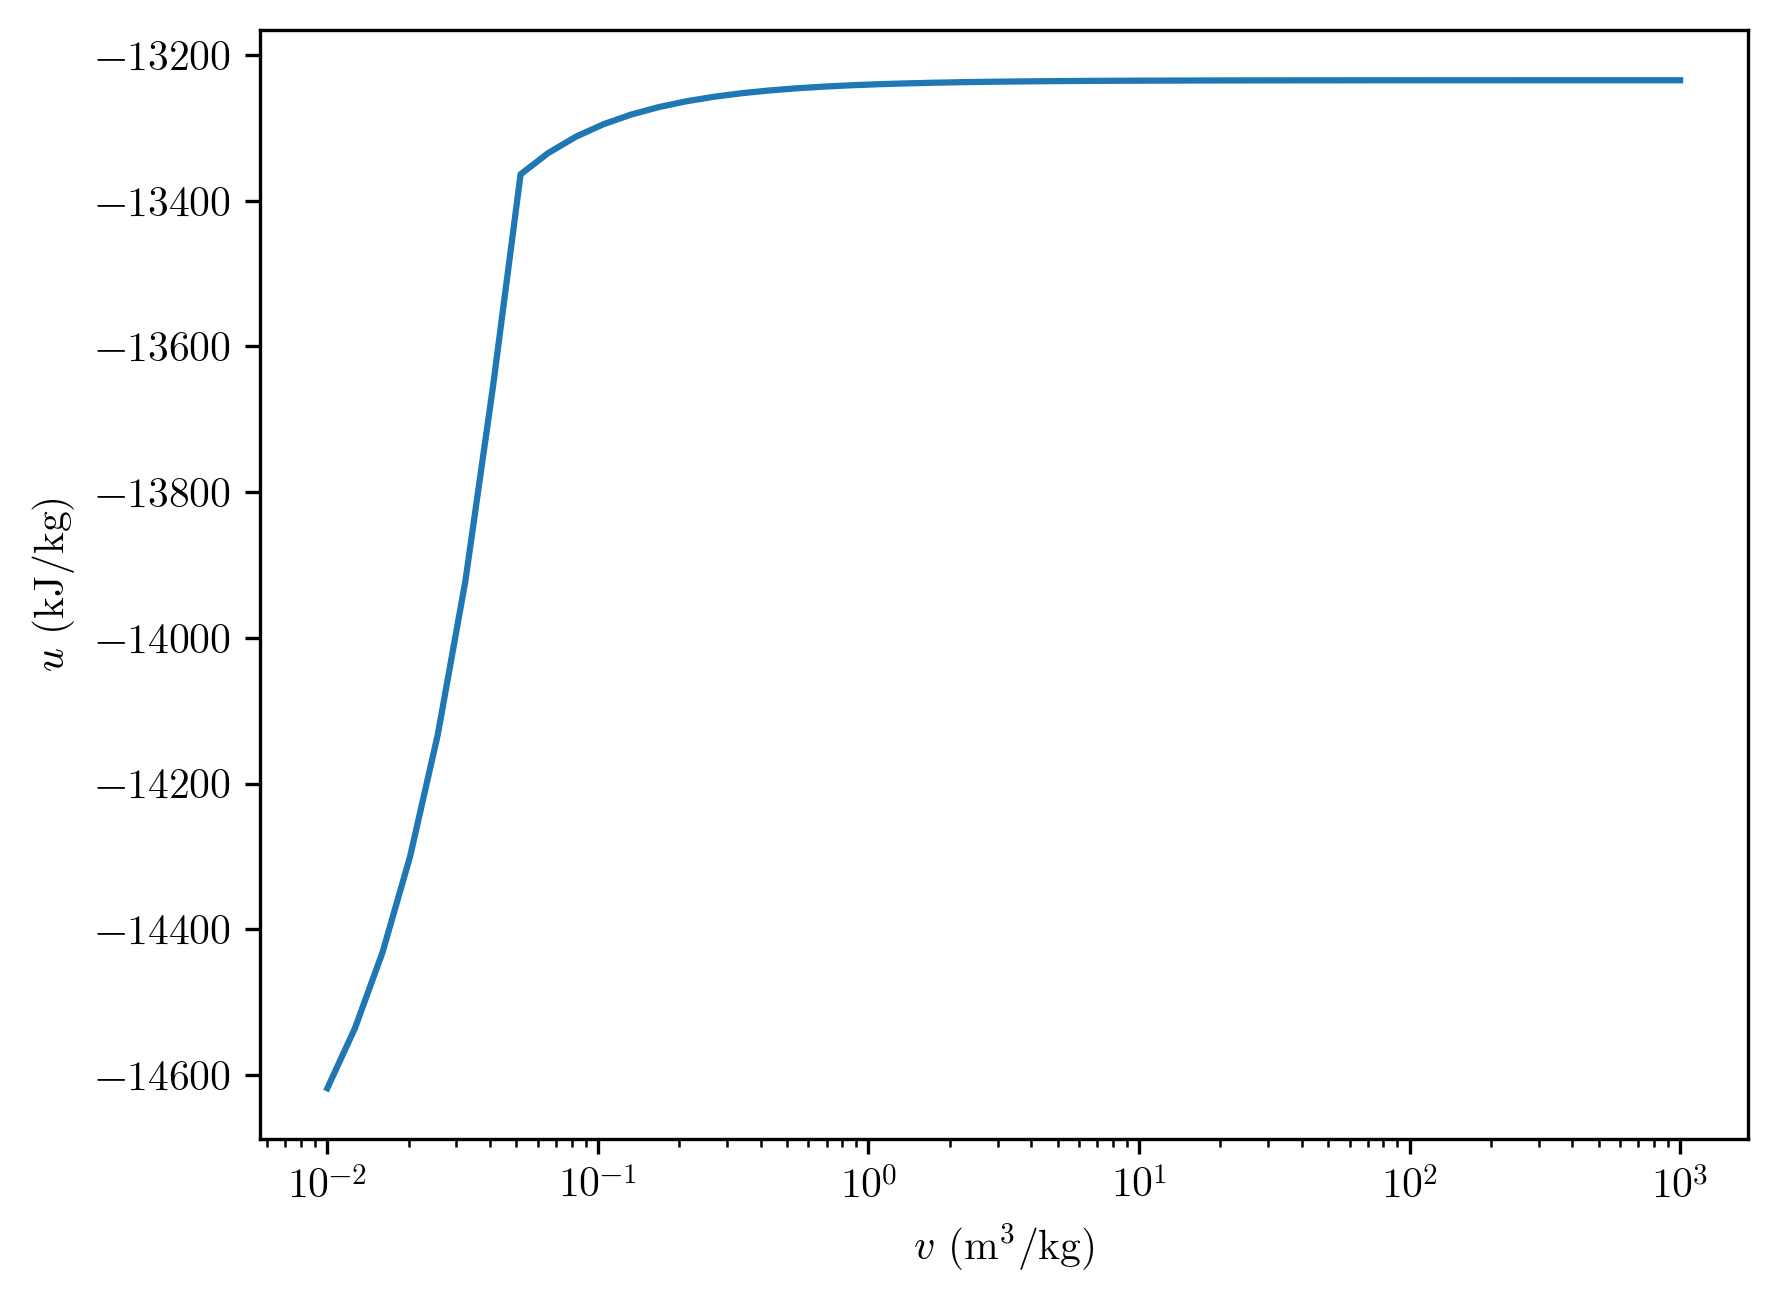

In [68]:
fig, ax = plt.subplots()
ax.semilogx(volumes, int_energies/1000)
ax.ticklabel_format(axis='y', useMathText=True)
ax.set_ylabel(r'$u$ (kJ/kg)')
ax.set_xlabel(r'$v$ (m$^3$/kg)')

plt.savefig('../images/ideal-gas-internal-energy.svg')
plt.show()
plt.close()

In [72]:
temps = np.linspace(100, 1000, 50) * ureg.degC
specific_heats = np.zeros_like(temps)

for idx, temp in enumerate(temps):
    water.TV = temp.to('K').magnitude, ct.one_atm
    specific_heats[idx] = water.cv

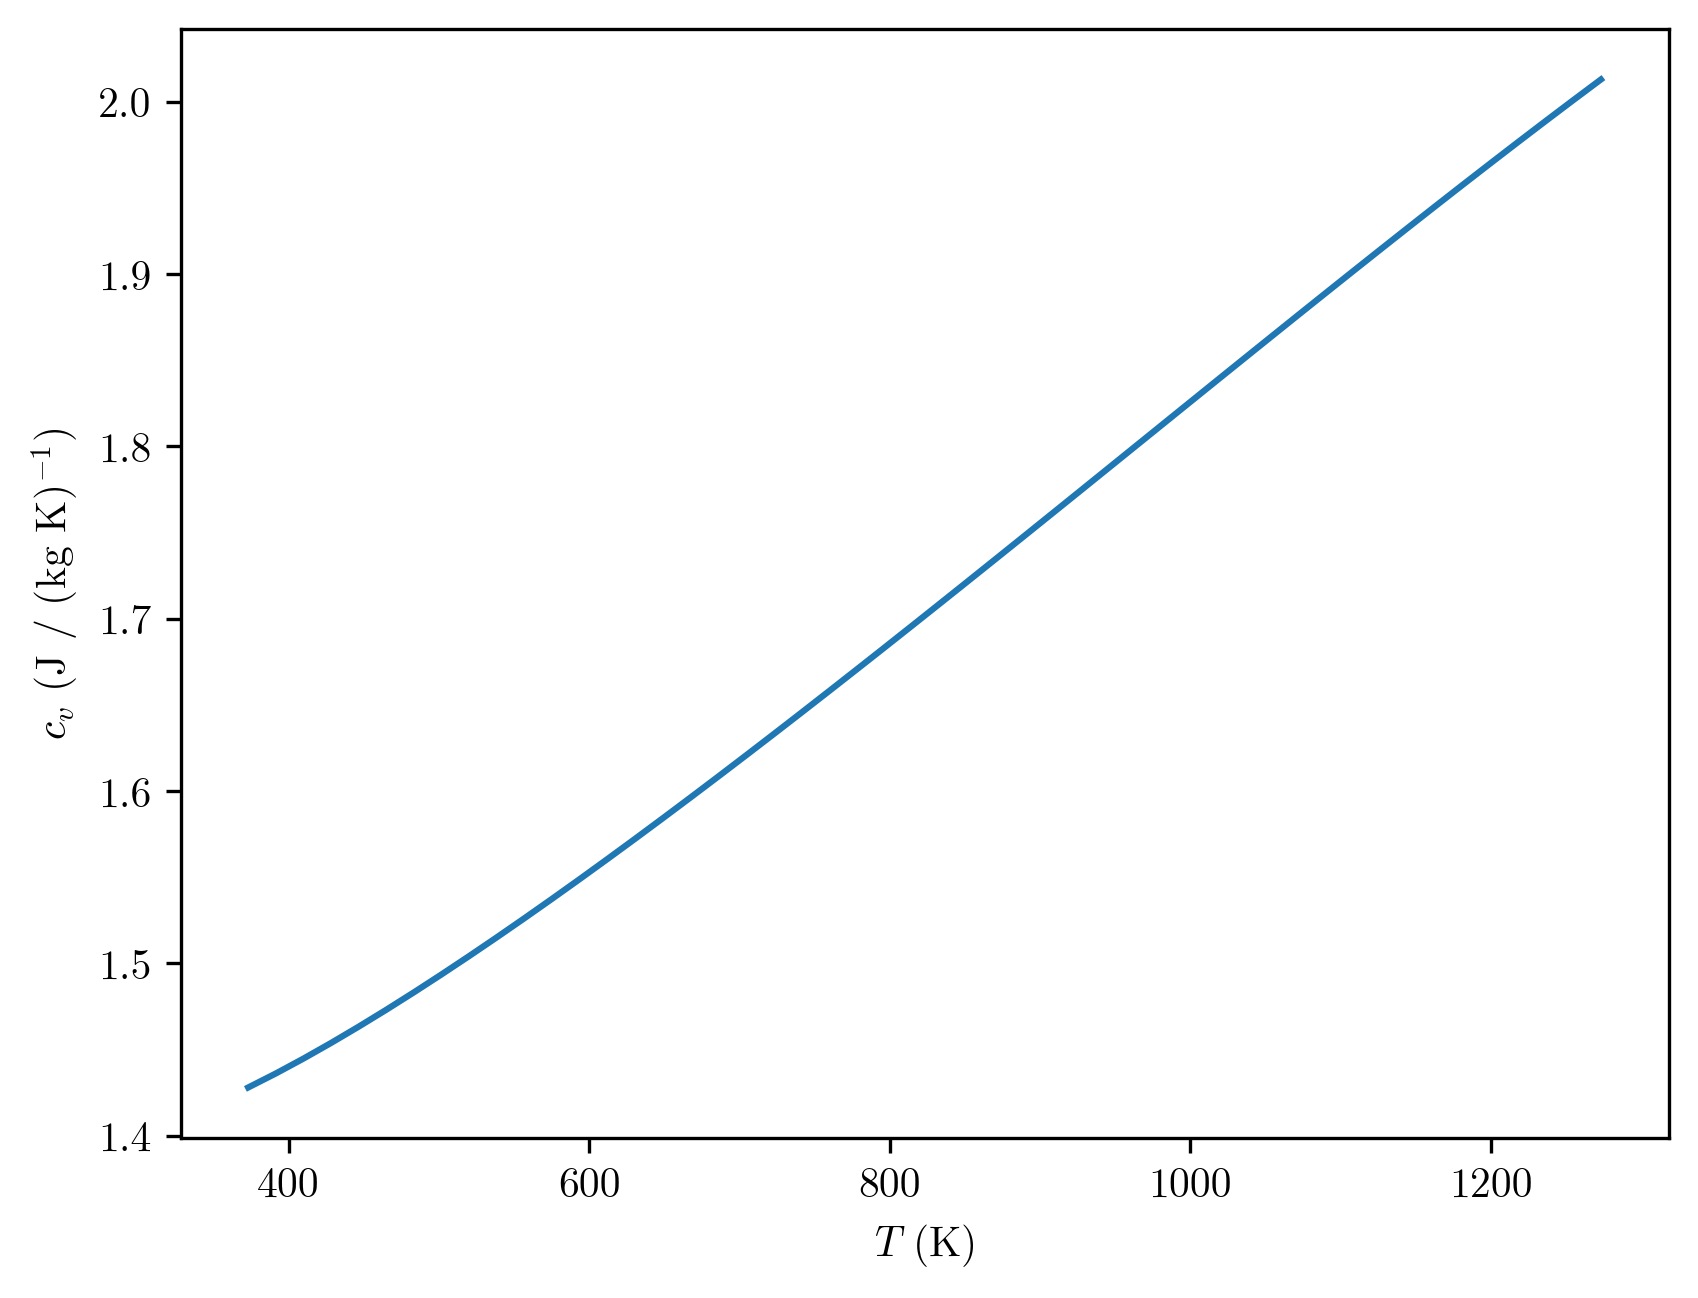

In [87]:
fig, ax = plt.subplots()
ax.plot(temps.to('K').magnitude, specific_heats/1000)
#ax.ticklabel_format(axis='y', useMathText=True)
ax.set_xlabel(r'$T$ (K)')
ax.set_ylabel(r'$c_v$ (J / (kg K)$^{-1}$)')

plt.savefig('../images/ideal-gas-specific-heat.svg')
plt.show()
plt.close()